# Load modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 2. Load the data

In [2]:
df_dnm = pd.read_csv("/Users/cmdb/qbb2020-answers/day5-lunch/aau1043_dnm.tsv")
df_dnm

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
df_parental_age = pd.read_csv("/Users/cmdb/qbb2020-answers/day5-lunch/aau1043_parental_age.tsv")
df_parental_age

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


# 3. Count the number of mutations per proband, and break down into maternally inherited, paternally inherited, and total de novo mutations (including of unknown parental origin).
# Store these counts in a new pandas dataframe with columns: Proband_id, pat_dnm, mat_dnm, tot_dnm.

In [4]:
df_tot_counts = df_dnm["Proband_id"].value_counts()
df_tot_counts

91410     122
114094    121
111288    115
8147      114
88246     113
         ... 
121087     37
62630      34
76504      34
37789      34
13990      33
Name: Proband_id, Length: 396, dtype: int64

In [5]:
df_dnm.groupby(by="Phase_combined")["Proband_id"].value_counts()

Phase_combined  Proband_id
father          91410         111
                114094         98
                111288         93
                99984          91
                64166          88
                             ... 
mother          137878          4
                37789           3
                113829          3
                130614          3
                121087          1
Name: Proband_id, Length: 792, dtype: int64

In [6]:
roi_father = df_dnm["Phase_combined"] == "father"
df_dnm.loc[roi_father, :]

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
6,chr2,8091216,C,T,24464,father,paternal_crossover,confirmed
9,chr20,54477057,G,A,5494,father,paternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26425,chr9,137267012,T,C,96471,father,NaN,NaN
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [7]:
df_dnm_f_counts = df_dnm.loc[roi_father, :]["Proband_id"].value_counts()
df_dnm_f_counts 

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

In [8]:
roi_mother = df_dnm["Phase_combined"] == "mother"
df_dnm.loc[roi_mother, :]

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
5,chr18,6485766,C,T,4131,mother,maternal_crossover,confirmed
7,chr2,132183025,C,T,104665,mother,maternal_crossover,confirmed
8,chr2,157675775,T,C,5410,mother,maternal_crossover,PCR failed
...,...,...,...,...,...,...,...,...
26404,chr9,135404985,G,A,146353,mother,NaN,NaN
26405,chr9,135420020,G,C,84737,mother,NaN,NaN
26408,chr9,135532928,ATA,A,21286,mother,NaN,NaN
26410,chr9,135764888,G,GC,29874,mother,NaN,NaN


In [9]:
df_dnm_m_counts = df_dnm.loc[roi_mother, :]["Proband_id"].value_counts()
df_dnm_m_counts

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: Proband_id, Length: 396, dtype: int64

In [10]:
#make new dataframe of series: paternal_dmn counts, maternal_dnm counts, and total dnms
df_counts = pd.DataFrame({"pat_dnm": df_dnm_f_counts, "mat_dnm": df_dnm_m_counts, "tot_dnm": df_tot_counts})
df_counts = df_counts.reset_index() #proband_id was the index, so pulling it out into new first column
df_counts.columns = ["Proband_id", "pat_dnm", "mat_dnm", "tot_dnm"]
df_counts

,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,675,51,19,70
1,1097,26,12,39
2,1230,42,12,57
3,1481,53,14,68
4,1806,61,11,78
...,...,...,...,...
391,153657,41,8,49
392,154565,61,14,75
393,154621,39,11,50
394,154810,55,14,69


# 4. Merge df_parental_age with new df

In [11]:
df_parental_age = pd.merge(df_parental_age, df_counts, on = "Proband_id")
df_parental_age

,Proband_id,Father_age,Mother_age,pat_dnm,mat_dnm,tot_dnm
0,675,31,36,51,19,70
1,1097,19,19,26,12,39
2,1230,30,28,42,12,57
3,1481,32,20,53,14,68
4,1806,38,34,61,11,78
...,...,...,...,...,...,...
391,153657,27,23,41,8,49
392,154565,36,30,61,14,75
393,154621,19,18,39,11,50
394,154810,32,28,55,14,69


# 5. Plot maternal dnms vs maternal age, and paternal dnms vs paternal age

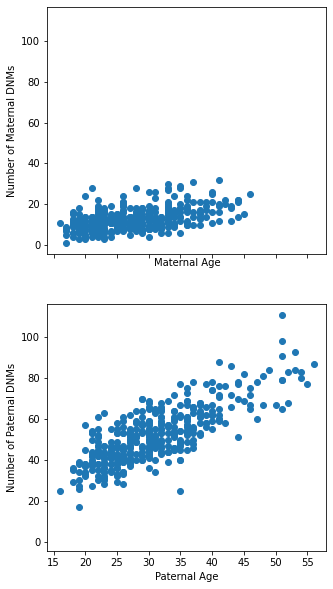

In [12]:
#maternal dnms vs maternal age
fig, ax = plt.subplots(figsize = (5, 10), nrows=2, sharex = True, sharey = True)
ax[0].scatter(x = df_parental_age["Mother_age"], 
           y = df_parental_age["mat_dnm"])
ax[0].set_xlabel("Maternal Age")
ax[0].set_ylabel("Number of Maternal DNMs")

ax[1].scatter(x = df_parental_age["Father_age"],
             y = df_parental_age["pat_dnm"])
ax[1].set_xlabel("Paternal Age")
ax[1].set_ylabel("Number of Paternal DNMs")

plt.show()


# 6. Use ordinary least squares smf.ols() to test for an association between maternal age and maternally inherited de novo mutations

In [19]:
model = smf.ols(formula = "mat_dnm ~ Mother_age", data = df_parental_age)
mat_results = model.fit()
mat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        17:19:27   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
mat_results.pvalues

Intercept     1.104177e-02
Mother_age    6.878208e-24
dtype: float64

# P-value is 6.878208e-24, therefore the relationship is significant.

# 7. Use ordinary least squares smf.ols() to test for an association between paternal age and paternally inherited de novo mutations.

In [22]:
model = smf.ols(formula = "pat_dnm ~ Father_age", data = df_parental_age)
pat_results = model.fit()
pat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        17:34:52   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pat_results.pvalues

Intercept     3.079437e-09
Father_age    1.552294e-84
dtype: float64

# P-value is 1.552294e-84, therefore the relationship is significant.

# 8. Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency.

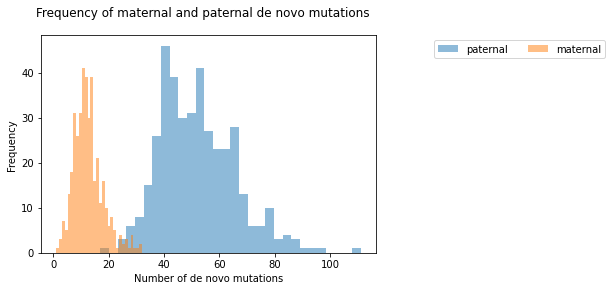

In [30]:
fig, ax = plt.subplots()
ax.hist(df_parental_age["pat_dnm"], label = "paternal", bins = 30, alpha = 0.5)
ax.hist(df_parental_age["mat_dnm"], label = "maternal", bins = 30, alpha = 0.5)
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
ax.set_xlabel("Number of de novo mutations")
ax.set_ylabel("Frequency")
fig.suptitle("Frequency of maternal and paternal de novo mutations")
plt.show()

# 9. Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.

In [31]:
model = smf.ols(formula = "pat_dnm ~ mat_dnm", data = df_parental_age)
pat_vs_mat_results = model.fit()
pat_vs_mat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     65.71
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           6.66e-15
Time:                        17:58:00   Log-Likelihood:                -1567.0
No. Observations:                 396   AIC:                             3138.
Df Residuals:                     394   BIC:                             3146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1337      1.712     22.855      0.000      35.767      42.500
mat_dnm        1.0079      0.124      8.106      0.000       0.763       1.252
==============================================================================
Omnibus:                       34.430   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.747
Skew:                           0.633   Prob(JB):                     4.28e-11
Kurtosis:                       4.137   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pat_vs_mat_results.pvalues

Intercept    3.254597e-74
mat_dnm      6.664949e-15
dtype: float64

# P-value is 6.664949e-15. Yes, the number of paternal dms vs maternal dnms per proband is significant

# 10. Re-fit the models (questions 6, 7, and 9) above using Poisson regression.

In [33]:
model = smf.poisson(formula = "mat_dnm ~ Mother_age", data = df_parental_age)
mat_poisson_results = model.fit()
mat_poisson_results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        18:02:49   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [34]:
mat_poisson_results.pvalues

Intercept     6.989401e-188
Mother_age     5.133524e-42
dtype: float64

In [35]:
model = smf.poisson(formula = "pat_dnm ~ Father_age", data = df_parental_age)
pat_poisson_results = model.fit()
pat_poisson_results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        18:04:04   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [36]:
pat_poisson_results.pvalues

Intercept      0.000000e+00
Father_age    1.169940e-192
dtype: float64

In [37]:
model = smf.poisson(formula = "pat_dnm ~ mat_dnm", data = df_parental_age)
pat_vs_mat_poisson_results = model.fit()
pat_vs_mat_poisson_results.summary()

Optimization terminated successfully.
         Current function value: 4.384364
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                 0.05379
Time:                        18:04:46   Log-Likelihood:                -1736.2
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                 7.684e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7100      0.019    199.212      0.000       3.674       3.747
mat_dnm        0.0185      0.001     14.260      0.000       0.016       0.021
==============================================================================
"""

In [38]:
pat_vs_mat_poisson_results.pvalues

Intercept    0.000000e+00
mat_dnm      3.862367e-46
dtype: float64

# 11. Using the relevant Poisson regression model that you fit, predict the number of paternal de novo mutations for a proband with a father who was 50.5 years old at the proband's time of birth.

In [42]:
intercept = 3.19
age_param = 0.0241
age = 50.5

y = 2.718**(intercept + (age_param*age))
print('predicted number of paternal de novo mutations for a proband with a 50.5-year old father is', y)

predicted number of paternal de novo mutations for a proband with a 50.5-year old father is 81.98965315230308
